In [ ]:
#ques1
#Occupations
#Step 1. Import the necessary libraries
#Step 2. Import the dataset from this address:https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user
#Step 3. Assign it to a variable called users
#Step 4. Discover what is the mean age per occupation
#Step 5. Discover the Male ratio per occupation and sort it from the most to the least
#Step 6. For each occupation, calculate the minimum and maximum ages
#Step 7. For each combination of occupation and sex, calculate the mean age
#Step 8. For each occupation present the percentage of women and men

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [11]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'
users = pd.read_csv(url, sep='|')
users.head(10)

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


In [10]:
users[["age", "occupation"]].groupby("occupation").mean()

,age
occupation,
administrator,38.746835
artist,31.392857
doctor,43.571429
educator,42.010526
engineer,36.388060
entertainment,29.222222
executive,38.718750
healthcare,41.562500
homemaker,32.571429


In [12]:
def conv_gender_to_numeric(x):
    if x == 'M':
        return 1
    if x == 'F':
        return 0
    
users['gender_num'] = users['gender'].apply(conv_gender_to_numeric)

ratio = users.groupby('occupation').gender_num.sum() / users.occupation.value_counts() * 100 

ratio.sort_values(ascending = False)

doctor           100.000000
engineer          97.014925
technician        96.296296
retired           92.857143
programmer        90.909091
executive         90.625000
scientist         90.322581
entertainment     88.888889
lawyer            83.333333
salesman          75.000000
educator          72.631579
student           69.387755
other             65.714286
marketing         61.538462
writer            57.777778
none              55.555556
administrator     54.430380
artist            53.571429
librarian         43.137255
healthcare        31.250000
homemaker         14.285714
dtype: float64

In [15]:
users.groupby('occupation').age.agg(['min', 'max'])


,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [16]:
users.groupby(['occupation', 'gender']).age.mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [17]:
gender_occup_count = users.groupby(['occupation', 'gender']).agg({'gender': 'count'})
occup_count = users.groupby(['occupation']).agg('count')
occup_gender_percent = gender_occup_count.div(occup_count, level = "occupation") * 100
occup_gender_percent.loc[: , 'gender']


occupation     gender
administrator  F          45.569620
               M          54.430380
artist         F          46.428571
               M          53.571429
doctor         M         100.000000
educator       F          27.368421
               M          72.631579
engineer       F           2.985075
               M          97.014925
entertainment  F          11.111111
               M          88.888889
executive      F           9.375000
               M          90.625000
healthcare     F          68.750000
               M          31.250000
homemaker      F          85.714286
               M          14.285714
lawyer         F          16.666667
               M          83.333333
librarian      F          56.862745
               M          43.137255
marketing      F          38.461538
               M          61.538462
none           F          44.444444
               M          55.555556
other          F          34.285714
               M          65.714286
progra

In [18]:
#ques:2
#Euro Teams
#Step 1. Import the necessary libraries
#Step 2. Import the dataset from this address:https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv
#Step 3. Assign it to a variable called euro12
#Step 4. Select only the Goal column
#Step 5. How many team participated in the Euro2012?
#Step 6. What is the number of columns in the dataset?
#Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
#Step 8. Sort the teams by Red Cards, then to Yellow Cards
#Step 9. Calculate the mean Yellow Cards given per Team
#Step 10. Filter teams that scored more than 6 goalsStep 11. Select the teams that start with G
#Step 12. Select the first 7 columns
#Step 13. Select all columns except the last 3
#Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [21]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv'
euro12 = pd.read_csv(url)
euro12.head(10)

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In [22]:
euro12['Goals']


0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [23]:
team_participated = euro12['Team'].count()
print(team_participated, "teams participated in  Euro2012")

16 teams participated in  Euro2012


In [24]:
columns = len(euro12.axes[1])
print("Number of Columns: ", columns)

Number of Columns:  35


In [25]:
discipline  = pd.DataFrame(euro12, columns = ['Team', 'Yellow Cards', 'Red Cards'])
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [26]:
discipline.sort_values(by=['Yellow Cards', 'Red Cards'])
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [27]:
Yellow_card_mean = discipline['Yellow Cards'].mean()
print("Mean Yellow Cards given per Team:", Yellow_card_mean)

Mean Yellow Cards given per Team: 7.4375


In [28]:
goal_morethan_6 = euro12['Goals'] > 6
euro12[goal_morethan_6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [29]:
euro12[euro12.Team.str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [30]:
euro12.head(7)

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [31]:
euro12.loc[:, euro12.columns != -3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In [32]:
euro12.loc[euro12.Team.isin(['England', 'Italy', 'Russia']), ['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


In [3]:

#Step 1. Import the necessary libraries
#Step 2. Create 3 differents Series, each of length 100, as follows:
#• The first a random number from 1 to 4
#• The second a random number from 1 to 3
# The third a random number from 10,000 to 30,000
#Step 3. Create a DataFrame by joinning the Series by column
#Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
#Step 5. Create a one column DataFrame with the values of the 3 Series and assign itto 'bigcolumn'
#Step 6. Ops it seems it is going only until index 99. Is it true?
#Step 7. Reindex the DataFrame so it goes from 0 to 299

In [2]:
import numpy as np
import pandas as pd
import random

In [4]:
first_series = [[random.randint(1, 4)] for i in range(100)]
df_first = pd.DataFrame(first_series)
df_first

,0
0,4
1,4
2,4
3,2
4,4
...,...
95,1
96,2
97,4
98,4


In [5]:
sec_series = [[random.randint(1, 3)] for i in range(100)]
df_sec = pd.DataFrame(sec_series)
df_sec

,0
0,2
1,2
2,3
3,3
4,3
...,...
95,1
96,1
97,1
98,3


In [6]:
third_series = [[random.randint(10000, 30000)] for i in range(100)]
df_third = pd.DataFrame(third_series)
df_third

,0
0,13186
1,23644
2,25700
3,29181
4,20840
...,...
95,23805
96,20701
97,20572
98,12924


In [7]:


df = pd.concat([df_first, df_sec, df_third], axis=1)
df



,0,0,0
0,4,2,13186
1,4,2,23644
2,4,3,25700
3,2,3,29181
4,4,3,20840
...,...,...,...
95,1,1,23805
96,2,1,20701
97,4,1,20572
98,4,3,12924


In [8]:
df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
df

,bedrs,bathrs,price_sqr_meter
0,4,2,13186
1,4,2,23644
2,4,3,25700
3,2,3,29181
4,4,3,20840
...,...,...,...
95,1,1,23805
96,2,1,20701
97,4,1,20572
98,4,3,12924


In [9]:
df_new = df.bedrs.astype(str).str.cat(df.bathrs.astype(str)).str.cat(df.price_sqr_meter.astype(str))
df_new.columns = ['bigcolumn']
df_new

0     4213186
1     4223644
2     4325700
3     2329181
4     4320840
       ...   
95    1123805
96    2120701
97    4120572
98    4312924
99    3125354
Name: bedrs, Length: 100, dtype: object

In [10]:
print(df_new)

0     4213186
1     4223644
2     4325700
3     2329181
4     4320840
       ...   
95    1123805
96    2120701
97    4120572
98    4312924
99    3125354
Name: bedrs, Length: 100, dtype: object


In [11]:
df_new.reset_index()
df_new.reindex(index=range(0,299))

0      4213186
1      4223644
2      4325700
3      2329181
4      4320840
        ...   
294        NaN
295        NaN
296        NaN
297        NaN
298        NaN
Name: bedrs, Length: 299, dtype: object

In [12]:
#Question 8
#Create a horizontal bar chart that compares the deadliest actors in Hollywood. 
#Sort the actors by their kill count and label each bar with the corresponding actor's name.
#Don't forget to label your axes!


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv(r'C:\Users\binith\Downloads\actor_kill_counts.csv')
df.head()

,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
2,Clint Eastwood,207
3,Clive Owen,194
4,Dolph Lundgren,239


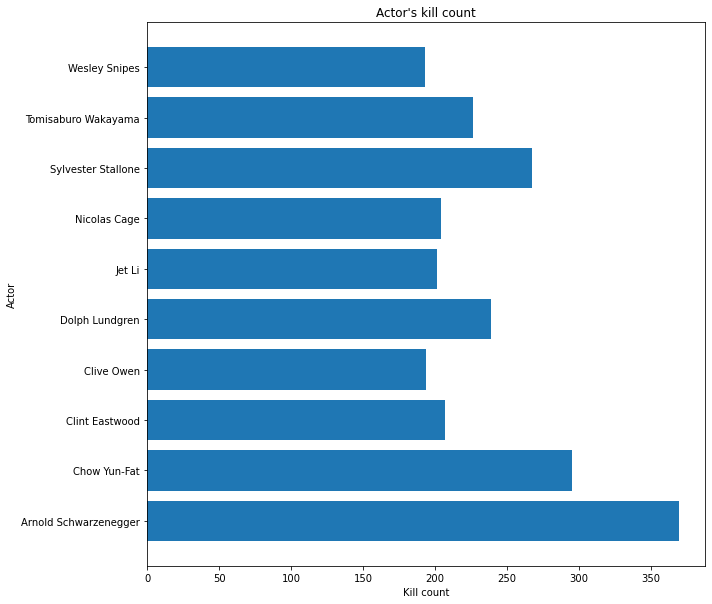

In [15]:
fig= plt.figure(figsize=(10,10))
plt.barh(df['Actor'], df['Count'])
plt.ylabel("Actor")
plt.xlabel("Kill count")
plt.title("Actor's kill count")
plt.show()

In [16]:
#ques:9
#Create a pie chart showing the fraction of all Roman Emperors that were assassinated.
#Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv(r'C:\Users\binith\Downloads\roman-emperor-reigns.csv')
df.head()

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide


In [19]:
assassinated_emperors = df[df['Cause_of_Death'].apply(lambda x: 'assassinated' in x.lower())]
print(assassinated_emperors)
number_assassinated = len(assassinated_emperors)
print(number_assassinated)

               Emperor  Length_of_Reign         Cause_of_Death
0             Augustus            40.58  Possibly assassinated
1             Tiberius            22.50  Possibly assassinated
2             Caligula             4.83           Assassinated
3             Claudius            13.75  Possibly assassinated
5                Galba             0.58           Assassinated
7            Vitellius             0.67           Assassinated
10            Domitian            15.00           Assassinated
17            Commodus            15.00           Assassinated
18            Pertinax             0.25           Assassinated
21           Caracalla            19.00           Assassinated
22                Geta             3.00           Assassinated
24          Elagabalus             3.75           Assassinated
25   Severus Alexander            13.00           Assassinated
26         Maximinus I             3.25           Assassinated
29            Pupienus             0.25           Assas

In [20]:
other_deaths = len(df) - number_assassinated
print(other_deaths)

38


In [23]:
#ques: 10
#Create a scatter plot showing the relationship between the total revenue earned by
#arcades and the number of Computer Science PhDs awarded in the U.S. between
#2000 and 2009.
#Don't forget to label your axes!
#Color each dot according to its year.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv(r'C:\Users\binith\Downloads\arcade-revenue-vs-cs-doctorates.csv')
df.head()

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948


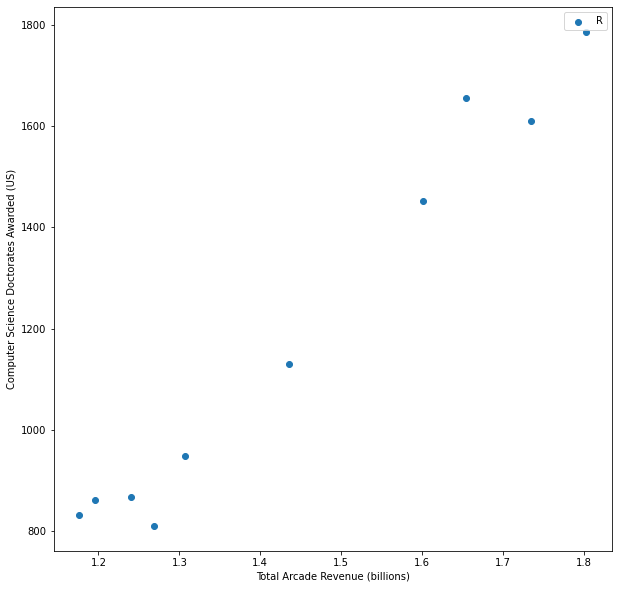

In [26]:
groups = df.groupby('Year')

arcade_revenue = df['Total Arcade Revenue (billions)'].values
cs_doctorates_awarded = df['Computer Science Doctorates Awarded (US)'].values
fig= plt.figure(figsize=(10,10))
plt.scatter(arcade_revenue,cs_doctorates_awarded)

plt.legend("Relationship between the total revenue earned")
plt.xlabel("Total Arcade Revenue (billions)")
plt.ylabel("Computer Science Doctorates Awarded (US)")
plt.show()